<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Quantum-Fourier-Transform-(QFT)" data-toc-modified-id="Quantum-Fourier-Transform-(QFT)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Quantum Fourier Transform (QFT)</a></span><ul class="toc-item"><li><span><a href="#N-=-1" data-toc-modified-id="N-=-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>N = 1</a></span><ul class="toc-item"><li><span><a href="#Circuit" data-toc-modified-id="Circuit-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Circuit</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Simulation</a></span></li></ul></li><li><span><a href="#N-=-2" data-toc-modified-id="N-=-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>N = 2</a></span><ul class="toc-item"><li><span><a href="#Circuit" data-toc-modified-id="Circuit-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Circuit</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Simulation</a></span></li></ul></li><li><span><a href="#N-=-3" data-toc-modified-id="N-=-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>N = 3</a></span><ul class="toc-item"><li><span><a href="#Circuit" data-toc-modified-id="Circuit-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Circuit</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Simulation</a></span></li></ul></li><li><span><a href="#Generalization-for-any-N" data-toc-modified-id="Generalization-for-any-N-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Generalization for any N</a></span></li><li><span><a href="#N-=-4" data-toc-modified-id="N-=-4-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>N = 4</a></span><ul class="toc-item"><li><span><a href="#Circuit" data-toc-modified-id="Circuit-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Circuit</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Simulation</a></span></li></ul></li></ul></li><li><span><a href="#Inverse-Fourier-Transform" data-toc-modified-id="Inverse-Fourier-Transform-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inverse Fourier Transform</a></span></li></ul></div>

# Quantum Fourier Transform (QFT) 

[Reference](https://community.qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html)

Fourier transform is a very important tool to signal processing. 

Here we will build a quantum version of a discrete fourier transform, this will be used in many quantum algorithms.

Discrete fourier transform is the map between two strings $F: (x_0, x_1, \dots, x_{N-1}) \rightarrow ((y_0, y_1, \dots, y_{N-1}))$.

\begin{equation}
F(x_k) = y_k = \frac{1}{\sqrt N} \sum_{l=0}^{N-1} x_l \omega_N^{lk}
\end{equation}

Where: $\omega_N^{lk} =  exp\left(2\pi i \frac{lk}{N}\right)$

Quantum Fourier transform does the same thing, but using quantum states: $F:\sum_{i=0}^{N-1} x_i\left| i \right> \rightarrow \sum_{i=0}^{N-1} y_i\left| i \right> $

\begin{equation}
F(x_k) = y_k = \frac{1}{\sqrt N} \sum_{l=0}^{N-1} x_l \omega_N^{lk}
\end{equation}

Where: $\omega_N^{lk} =  exp\left(2\pi i \frac{lk}{N}\right)$

This can be represented by an unitary matrix:
\begin{equation}
F = \frac{1}{\sqrt N} \sum_{x=0}^{N-1}\sum_{y=0}^{N-1} \omega_N^{lk}  \left| y \right> \left< x \right|
\end{equation}



To find the circuit representation of the fourier transform we need to see how it works on $2^N$ qubits first:

\begin{equation}
\begin{split}
F\left(\left| x \right>\right) & = \frac{1}{\sqrt N} \sum_{y=0}^{N-1} \omega_N^{xy} \left| y \right> \\
  & = D
\end{split}
\end{equation}

In [2]:
%matplotlib inline
import qiskit as Qsk
import numpy as np
import matplotlib.pyplot as plt

## N = 1

### Circuit

In [83]:
Q_Circuit = Qsk.QuantumCircuit(1)

In [84]:
Q_Circuit.h(0);

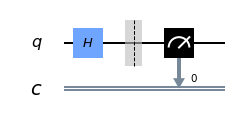

In [85]:
circ_meas = Qsk.QuantumCircuit(1, 1)
circ_meas.barrier(range(1))
circ_meas.measure(qubit=0,cbit=0)
final_circ = Q_Circuit + circ_meas
final_circ.draw(output='mpl')

### Simulation

In [86]:
backend_sim = Qsk.Aer.get_backend('qasm_simulator')
job_sim = Qsk.execute(final_circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(final_circ)
print(counts)

{'0': 529, '1': 495}


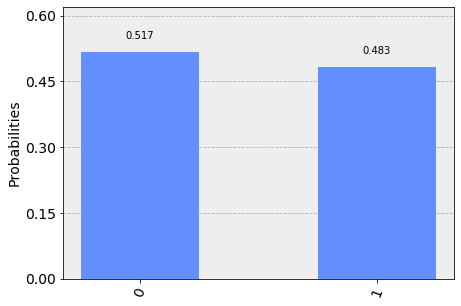

In [87]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## N = 2

### Circuit

In [99]:
Q_Circuit = Qsk.QuantumCircuit(2)

In [100]:
Q_Circuit.h(0);
Q_Circuit.cu1(np.pi,1,0);
Q_Circuit.barrier()
Q_Circuit.h(1);

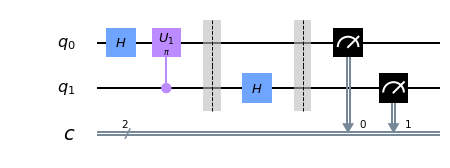

In [101]:
circ_meas = Qsk.QuantumCircuit(2, 2)
circ_meas.barrier();
circ_meas.measure(range(2),range(2));
final_circ = Q_Circuit + circ_meas
final_circ.draw(output='mpl')

### Simulation

In [91]:
backend_sim = Qsk.Aer.get_backend('qasm_simulator')
job_sim = Qsk.execute(final_circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(final_circ)
print(counts)

{'00': 258, '01': 284, '10': 247, '11': 235}


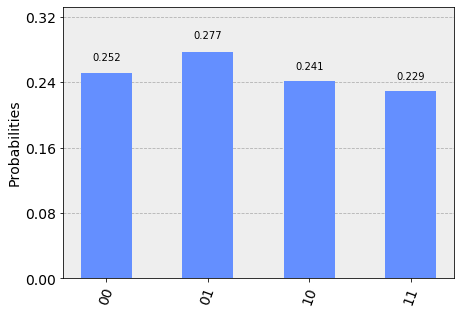

In [92]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## N = 3

### Circuit

In [105]:
n = 3
Q_Circuit = Qsk.QuantumCircuit(n)
for i in range(n):
        Q_Circuit.h(i)
        for j in range(i+1,n):
            Q_Circuit.cu1(np.pi/float(2**(j-i)), j, i)
        Q_Circuit.barrier()

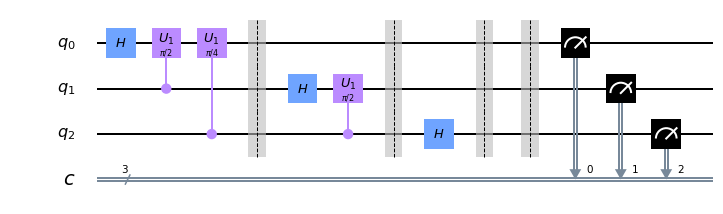

In [128]:
F_Circ.draw(output='mpl')

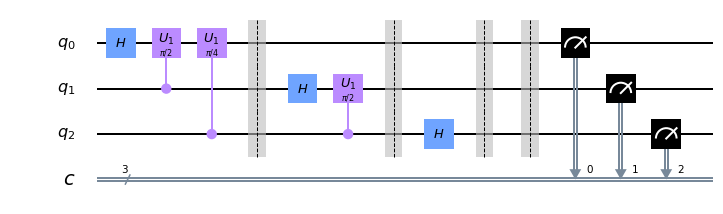

In [107]:
circ_meas = Qsk.QuantumCircuit(n, n)
circ_meas.barrier();
circ_meas.measure(range(n),range(n));
final_circ = Q_Circuit + circ_meas
final_circ.draw(output='mpl')

### Simulation

In [108]:
backend_sim = Qsk.Aer.get_backend('qasm_simulator')
job_sim = Qsk.execute(final_circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(final_circ)
print(counts)

{'001': 114, '011': 133, '010': 133, '000': 139, '110': 124, '101': 133, '111': 127, '100': 121}


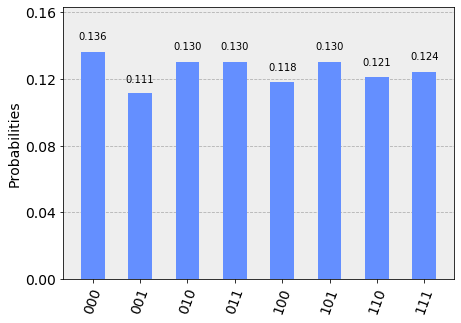

In [109]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [111]:
len(Q_Circuit)

9

## Generalization for any N

In [129]:
def qft(Q,N):
    """ Method for the Quantum Fourier Transform.
    
    Parameters
    ---------------------------------------------
    Q(QuantumCircuit): Quantum Circuit with N qubits.
    N(Float): Number of Qubits.
    """

    for i in range(N):
        Q_Circuit.h(i)
        for j in range(i+1,N):
            Q_Circuit.cu1(np.pi/float(2**(j-i)), j, i)
        Q_Circuit.barrier()
        
def Clas_Measur_Circuit(Q,N):
    """ Method for creating the measurements for
    all qubits.
    
    Parameters
    ---------------------------------------------
    Q(QuantumCircuit): Quantum Circuit with N 
                       qubits.
    
    N(Float): Number of Qubits.
    
    Outputs:
    ---------------------------------------------
    final_circ(QuantumCircuit): Quantum Circuit
    with all measurements.
    
    """

    circ_meas = Qsk.QuantumCircuit(N, N)
    circ_meas.barrier();
    circ_meas.measure(range(N),range(N));
    final_circ = Q + circ_meas
    final_circ.draw(output='mpl')
    
    return final_circ

## N = 4

### Circuit

In [130]:
N = 4
Q_Circuit = Qsk.QuantumCircuit(N)
qft(Q_Circuit, N)
F_Circ = Clas_Measur_Circuit(Q_Circuit, N)

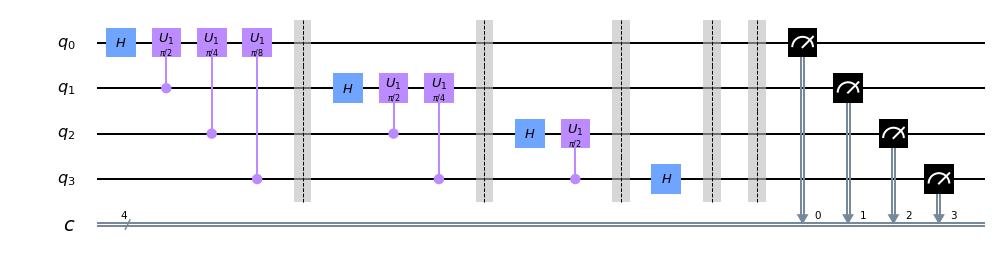

In [131]:
F_Circ.draw(output='mpl')

### Simulation

In [132]:
backend_sim = Qsk.Aer.get_backend('qasm_simulator')
job_sim = Qsk.execute(final_circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(final_circ)

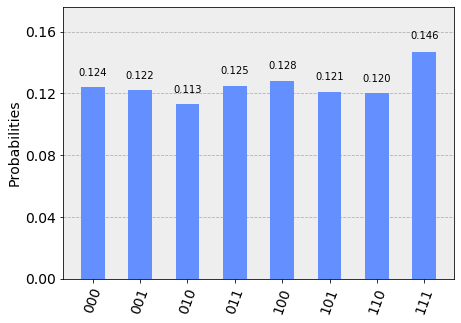

In [133]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# Inverse Fourier Transform

----------------------------------------------------------------------------------------------------

In [110]:
import qiskit.tools.jupyter
%qiskit_version_table